<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1IBrJRAeEfWsS2dihx_bVieV0FN5RL5fb" width="800"/>
</p>


---
### 📌 COMP47980:	Generative AI	And	Language	Model

---
- Student Name: Ayush Poojari
- Student ID: 24214170
---


<h3 style="color: blue;">🤖 MyFitnessPal - Assistant</h3>

<p style="text-align: center;">
  <em>
    MyFitnessPal - Assistant is a domain-focused conversational AI built to support personal health and fitness journeys.<br><br>
    It helps users track workouts, monitor daily nutrition, and receive tailored recommendations using curated fitness data.<br><br>
    The assistant combines intelligent data retrieval with real-time response generation to deliver useful, accurate, and actionable insights.<br><br>
    By focusing solely on the fitness domain, it offers a more precise and engaging experience compared to generic AI tools.
  </em>
</p>

---

### Importing Libraries

In [24]:
import os
import time
import tempfile
from openai import OpenAI
import ipywidgets as widgets
from IPython.display import display

### Importing OPENAI_API_KEY from Google Colab Secrets

In [25]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

### Configuring Client

In [26]:
client = OpenAI(api_key=OPENAI_API_KEY)

In [27]:
client

### Creating MyFitnessPal Assistant

In [ ]:
assistant = client.beta.assistants.create(
            name="MyFitnessPal Assistant",
            instructions= ("You are a supportive and knowledgeable fitness assistant named MyFitnessPal"
                           "Your role is to provide fitness and health advice based on user input provided by user. "
                           "Track workout progress, analyze diet plans, and visualize fitness metrics if user asks for visualisations. "
                           "You help users with workout routines, suggest exercises, and assist in setting achievable fitness goals. "
                           "If provided with workout logs, diet logs, or activity data, in csv or pdf format you analyze the information and suggest improvements. "
                           "For specific data inputs, like steps, calories burned, or macros, you can generate visualizations such as charts and graphs to help track progress. "
                           "Always be encouraging and offer tips to improve health while avoiding medical advice."
                           "If image is provided of meal/food you must give approximate calories better alternative and classify healthy or jnk food."),
            tools=[{"type": "code_interpreter"}, {"type": "file_search"}],
            model="gpt-4o"
        )

In [ ]:
assistant

Assistant(id='asst_NFurmGzbHyCkpBOfDFDRwAzp', created_at=1746298189, description=None, instructions='You are a supportive and knowledgeable fitness assistant named MyFitnessPalYour role is to provide fitness and health advice based on user input provided by user. Track workout progress, analyze diet plans, and visualize fitness metrics if user asks for visualisations. You help users with workout routines, suggest exercises, and assist in setting achievable fitness goals. If provided with workout logs, diet logs, or activity data, in csv or pdf format you analyze the information and suggest improvements. For specific data inputs, like steps, calories burned, or macros, you can generate visualizations such as charts and graphs to help track progress. Always be encouraging and offer tips to improve health while avoiding medical advice.If image is provided of meal/food you must give approximate calories better alternative and classify healthy or jnk food.', metadata={}, model='gpt-4o', nam

### Getting Assistant ID

In [ ]:
print(f"Assistant ID: {assistant.id}")

Assistant ID: asst_NFurmGzbHyCkpBOfDFDRwAzp


### 👤 Creating User Profile

- **Name:** Ayush Poojari  
- **Age:** 25  
- **Height:** 5 ft 10 in  
- **Weight:** 72 kg  
- **Goal Weight:** 68 kg  
- **Activity Level:** Lightly Active  

**Fitness Goals:**  
- ✔️ Lose weight  
- ✔️ Gain muscle  
- ✔️ Modify diet  

In [ ]:
from IPython.display import display, Markdown, HTML, clear_output
import ipywidgets as widgets

# Tracking user data across steps
user_data = {}

def user_detail():
    clear_output()
    global user_data

    # Step 1: Name Entry UI
    display(HTML("""
    <div style='text-align: center; font-family: Arial, sans-serif;'>
        <h1 style='color: #4a90e2;'>MyFitnessPal</h1>
        <h4>Your fitness Assistant</h4>
    </div>
    """))

    display(Markdown("**What's your first name?**"))
    display(Markdown("Let's get to know a little about you."))

    first_name = widgets.Text(
        placeholder='Enter your first name',
        description='First Name:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='300px')
    )

    back_btn = widgets.Button(description="BACK", layout=widgets.Layout(width='100px'))
    next_btn = widgets.Button(description="NEXT", layout=widgets.Layout(width='100px'))

    display(widgets.VBox([
        first_name,
        widgets.HBox([back_btn, next_btn], layout=widgets.Layout(justify_content='center'))
    ]))

    def on_next_clicked(b):
        if first_name.value.strip() == "":
            display(HTML("<p style='color: red; text-align: center;'>Please enter your first name</p>"))
        else:
            user_data['name'] = first_name.value
            user_goal()

    next_btn.on_click(on_next_clicked)
    back_btn.on_click(lambda b: print("Going back..."))

def user_goal():
    clear_output()
    global user_data

    # Step 2: Goal Selection UI
    display(HTML(f"""
    <div style='text-align: center; font-family: Arial, sans-serif;'>
        <h1 style='color: #4a90e2;'>Thanks {user_data['name']}!</h1>
        <p>Now for your goals.</p>
        <p style='font-size: 0.9em; color: #666;'>
            Select up to 3 that are important to you, including one weight goal.
        </p>
    </div>
    """))

    goals = [
        "Lose weight",
        "Maintain weight",
        "Gain weight",
        "Gain muscle",
        "Modify my diet",
        "Manage stress",
        "Increase step count"
    ]

    checkboxes = [widgets.Checkbox(value=False, description=goal) for goal in goals]

    def validate_goals():
        selected = [box.description for box in checkboxes if box.value]
        weight_goals = {"Lose weight", "Maintain weight", "Gain weight"}
        has_weight_goal = any(g in weight_goals for g in selected)

        if len(selected) == 0:
            return "Please select at least one goal"
        elif len(selected) > 3:
            return "Please select no more than 3 goals"
        elif not has_weight_goal:
            return "Please include at least one weight goal"
        return None

    back_btn = widgets.Button(description="BACK", layout=widgets.Layout(width='100px'))
    next_btn = widgets.Button(description="NEXT", layout=widgets.Layout(width='100px'))
    status = widgets.Output()

    def on_next_clicked(b):
        error = validate_goals()
        if error:
            with status:
                status.clear_output()
                display(HTML(f"<p style='color: red; text-align: center;'>{error}</p>"))
        else:
            user_data['goals'] = [box.description for box in checkboxes if box.value]
            activity_level()

    def on_back_clicked(b):
        user_detail()

    next_btn.on_click(on_next_clicked)
    back_btn.on_click(on_back_clicked)

    display(widgets.VBox(checkboxes))
    display(widgets.HBox([back_btn, next_btn], layout=widgets.Layout(justify_content='center')))
    display(status)

def activity_level():
    clear_output()
    global user_data

    # Step 4: Activity Level UI
    display(HTML(f"""
    <div style='text-align: center; font-family: Arial, sans-serif;'>
        <h1 style='color: #4a90e2;'>What is your baseline activity level?</h1>
        <p style='color: #666;'>Not including workouts—we count that separately</p>
    </div>
    """))

    # Activity level options
    activity_levels = [
        ("Not Very Active", "Spend most of the day sitting (e.g., bank teller, desk job)"),
        ("Lightly Active", "Spend a good part of the day on your feet (e.g., teacher, salesperson)"),
        ("Active", "Spend a good part of the day doing some physical activity (e.g., food server, postal carrier)"),
        ("Very Active", "Spend a good part of the day doing heavy physical activity (e.g., bike messenger, carpenter)")
    ]

    # Create radio buttons for activity level selection
    activity_radio = widgets.RadioButtons(
        options=[f"{level[0]}{level[1]}" for level in activity_levels],
        layout={'width': 'max-content'},
        style={'description_width': 'initial'}
    )

    # Navigation buttons
    back_btn = widgets.Button(description="BACK", layout=widgets.Layout(width='100px'))
    next_btn = widgets.Button(description="NEXT", layout=widgets.Layout(width='100px'))

    def on_next_clicked(b):
        selected_index = activity_radio.index
        user_data['activity_level'] = activity_levels[selected_index][0]
        personal_details()

    def on_back_clicked(b):
        user_goal()

    next_btn.on_click(on_next_clicked)
    back_btn.on_click(on_back_clicked)

    # Display all components
    display(HTML("<div style='max-width: 500px; margin: 0 auto;'>"))
    display(activity_radio)
    display(HTML("</div>"))
    display(widgets.HBox([back_btn, next_btn], layout=widgets.Layout(justify_content='center')))

def personal_details():
    clear_output()
    global user_data

    # Step 6: Personal Details UI
    display(HTML("""
    <div style='text-align: center; font-family: Arial, sans-serif;'>
        <h1 style='color: #4a90e2;'>Tell us more about yourself</h1>
    </div>
    """))

    # Age input
    age = widgets.IntText(
        value=25,
        min=13,
        max=120,
        description='Age (years):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='200px')
    )

    # Height input (feet and inches)
    height_ft = widgets.IntText(
        value=5,
        min=3,
        max=8,
        description='Height (feet):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='150px')
    )

    height_in = widgets.IntText(
        value=6,
        min=0,
        max=11,
        description='Height (inches):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='150px')
    )

    # Weight inputs
    current_weight = widgets.FloatText(
        value=150,
        min=50,
        max=500,
        step=0.5,
        description='Current weight (lbs):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='250px')
    )

    goal_weight = widgets.FloatText(
        value=140,
        min=50,
        max=500,
        step=0.5,
        description='Goal weight (lbs):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='250px')
    )

    # Unit toggle
    metric_toggle = widgets.ToggleButton(
        value=False,
        description='Use Metric Units (cm/kg)',
        tooltip='Toggle between imperial and metric',
        layout=widgets.Layout(width='250px')
    )

    # Navigation buttons
    back_btn = widgets.Button(description="BACK", layout=widgets.Layout(width='100px'))
    next_btn = widgets.Button(description="NEXT", layout=widgets.Layout(width='100px'))

    # Unit conversion function
    def on_metric_toggle(change):
        if change['new']:
            metric_toggle.description = 'Use Imperial Units (ft/lbs)'
            # Convert to metric
            total_inches = height_ft.value * 12 + height_in.value
            cm = round(total_inches * 2.54)
            height_ft.value = cm
            height_ft.description = 'Height (cm):'
            height_in.layout.visibility = 'hidden'

            kg = round(current_weight.value * 0.453592, 1)
            current_weight.value = kg
            current_weight.description = 'Current weight (kg):'

            goal_kg = round(goal_weight.value * 0.453592, 1)
            goal_weight.value = goal_kg
            goal_weight.description = 'Goal weight (kg):'
        else:
            metric_toggle.description = 'Use Metric Units (cm/kg)'
            # Convert back to imperial
            cm = height_ft.value
            total_inches = round(cm / 2.54)
            height_ft.value = total_inches // 12
            height_in.value = total_inches % 12
            height_ft.description = 'Height (feet):'
            height_in.layout.visibility = 'visible'

            kg = current_weight.value
            current_weight.value = round(kg * 2.20462, 1)
            current_weight.description = 'Current weight (lbs):'

            goal_kg = goal_weight.value
            goal_weight.value = round(goal_kg * 2.20462, 1)
            goal_weight.description = 'Goal weight (lbs):'

    metric_toggle.observe(on_metric_toggle, 'value')

    def on_next_clicked(b):
        user_data['age'] = age.value

        if metric_toggle.value:
            user_data['height'] = f"{height_ft.value} cm"
            user_data['current_weight'] = f"{current_weight.value} kg"
            user_data['goal_weight'] = f"{goal_weight.value} kg"
        else:
            user_data['height'] = f"{height_ft.value} ft {height_in.value} in"
            user_data['current_weight'] = f"{current_weight.value} lbs"
            user_data['goal_weight'] = f"{goal_weight.value} lbs"

        submit_data()

    def on_back_clicked(b):
        activity_level()

    next_btn.on_click(on_next_clicked)
    back_btn.on_click(on_back_clicked)

    # Display all components
    display(age)
    display(widgets.HBox([height_ft, height_in]))
    display(metric_toggle)
    display(current_weight)
    display(goal_weight)
    display(widgets.HBox([back_btn, next_btn], layout=widgets.Layout(justify_content='center')))

def submit_data():
    clear_output()
    global user_data

    # Final Submission UI
    display(HTML(f"""
    <div style='text-align: center; font-family: Arial, sans-serif;'>
        <h1 style='color: #4a90e2;'>Review Your Information</h1>
        <p>Please verify your details before submitting</p>
    </div>
    """))

    # Create a summary table
    summary = f"""
    <table style='margin: 0 auto; width: 80%; border-collapse: collapse;'>
        <tr style='border-bottom: 1px solid #ddd;'>
            <td style='padding: 8px; text-align: left; width: 40%;'><strong>Name:</strong></td>
            <td style='padding: 8px; text-align: left;'>{user_data.get('name', '')}</td>
        </tr>
        <tr style='border-bottom: 1px solid #ddd;'>
            <td style='padding: 8px; text-align: left;'><strong>Goals:</strong></td>
            <td style='padding: 8px; text-align: left;'>{', '.join(user_data.get('goals', []))}</td>
        </tr>
        <tr style='border-bottom: 1px solid #ddd;'>
            <td style='padding: 8px; text-align: left;'><strong>Activity Level:</strong></td>
            <td style='padding: 8px; text-align: left;'>{user_data.get('activity_level', '')}</td>
        </tr>
        <tr style='border-bottom: 1px solid #ddd;'>
            <td style='padding: 8px; text-align: left;'><strong>Age:</strong></td>
            <td style='padding: 8px; text-align: left;'>{user_data.get('age', '')} years</td>
        </tr>
        <tr style='border-bottom: 1px solid #ddd;'>
            <td style='padding: 8px; text-align: left;'><strong>Height:</strong></td>
            <td style='padding: 8px; text-align: left;'>{user_data.get('height', '')}</td>
        </tr>
        <tr style='border-bottom: 1px solid #ddd;'>
            <td style='padding: 8px; text-align: left;'><strong>Current Weight:</strong></td>
            <td style='padding: 8px; text-align: left;'>{user_data.get('current_weight', '')}</td>
        </tr>
        <tr>
            <td style='padding: 8px; text-align: left;'><strong>Goal Weight:</strong></td>
            <td style='padding: 8px; text-align: left;'>{user_data.get('goal_weight', '')}</td>
        </tr>
    </table>
    """

    display(HTML(summary))

    # Create submit button
    submit_btn = widgets.Button(
        description="SUBMIT",
        button_style='success',
        icon='check',
        layout=widgets.Layout(width='200px', height='40px')
    )

    back_btn = widgets.Button(description="BACK", layout=widgets.Layout(width='100px'))

    def on_submit_clicked(b):
        clear_output()
        display(HTML(f"""
        <div style='text-align: center; font-family: Arial, sans-serif;'>
            <h1 style='color: #4a90e2;'>🎉 Congratulations, {user_data['name']}!</h1>
            <p>Your MyFitnessPal account has been created successfully.</p>
            <p>We'll help you reach your goals:</p>
            <p><strong>{', '.join(user_data['goals'])}</strong></p>
            <p>Starting today, you're on your way to a healthier you!</p>
        </div>
        """))

    def on_back_clicked(b):
        personal_details()

    submit_btn.on_click(on_submit_clicked)
    back_btn.on_click(on_back_clicked)

    display(widgets.HBox([back_btn, submit_btn], layout=widgets.Layout(justify_content='center')))

# User Signup Flow
user_detail()

### User Data Collected

In [ ]:
user_data

{'name': 'Ayush Poojari',
 'goals': ['Maintain weight', 'Gain muscle', 'Modify my diet'],
 'activity_level': 'Lightly Active',
 'age': 24,
 'height': '5 ft 8 in',
 'current_weight': '176.4 lbs',
 'goal_weight': '176.4 lbs'}

### Create a user-specific thread

In [ ]:
thread = client.beta.threads.create(
    messages=[{
        "role": "user",
        "content": f"My name is {user_data['name']}. I'm looking to get help with my fitness goals {user_data['goals']}.",
    }]
)

In [ ]:
thread

Thread(id='thread_LtNFSzpKR9SaiiyMSwqQb7Dz', created_at=1746298674, metadata={}, object='thread', tool_resources=ToolResources(code_interpreter=None, file_search=None))

In [ ]:
run = client.beta.threads.runs.create(
            thread_id=thread.id,
            assistant_id=assistant.id
        )

In [ ]:
run

Run(id='run_XkxN8b3qUGKfHuSIWI84uH9c', assistant_id='asst_NFurmGzbHyCkpBOfDFDRwAzp', cancelled_at=None, completed_at=None, created_at=1746298720, expires_at=1746299320, failed_at=None, incomplete_details=None, instructions='You are a supportive and knowledgeable fitness assistant named MyFitnessPalYour role is to provide fitness and health advice based on user input provided by user. Track workout progress, analyze diet plans, and visualize fitness metrics if user asks for visualisations. You help users with workout routines, suggest exercises, and assist in setting achievable fitness goals. If provided with workout logs, diet logs, or activity data, in csv or pdf format you analyze the information and suggest improvements. For specific data inputs, like steps, calories burned, or macros, you can generate visualizations such as charts and graphs to help track progress. Always be encouraging and offer tips to improve health while avoiding medical advice.If image is provided of meal/food

### Response generated

In [ ]:
response = client.beta.threads.messages.list(thread_id=thread.id)
latest_response = response.data[0]

### Latest response generated

In [ ]:
latest_response

Message(id='msg_nfYx8zB5WnQzLQ4gWGnZ5nVM', assistant_id='asst_NFurmGzbHyCkpBOfDFDRwAzp', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="Hi Ayush! It's great that you're looking to maintain your weight, gain muscle, and modify your diet. Let's break down each of these goals and come up with a plan:\n\n1. **Maintain Weight**: \n   - To maintain your weight, aim to consume as many calories as you burn. This is called your maintenance caloric intake.\n   - Keep track of your daily calories using a food diary or a tracking app. This will help you stay within your target range.\n\n2. **Gain Muscle**:\n   - Focus on resistance training exercises at least 3-4 times a week. Compound exercises like squats, deadlifts, bench presses, and pull-ups are effective.\n   - Ensure you're getting enough protein. A good rule of thumb is to consume around 1.6 to 2.2 grams of protein per kilogram of body weight.\n\n3. **Modify Your Diet**:\n   - Include a balanc

---
# Building MyFitnessPal Assistant

A domain-specific, AI-powered assistant for fitness and nutrition goals, built using the **OpenAI Assistants API**. The assistant supports natural language chat, nutrition label analysis via image uploads, and personalized fitness guidance through structured inputs.

## 🚀 Overview

**MyFitnessPal Assistant** helps users:
- Create goal-based fitness and diet plans
- Analyze meals and food labels (calories, macros, healthiness)
- Track progress and receive personalized workout suggestions
- Ask general wellness and fitness questions

It combines structured input forms, file-based RAG (retrieval augmented generation), function calling (e.g., for BMI, macros), and assistant threading to maintain context.

---

## 🧠 Assistant Details

- **Assistant Name:** `MyFitnessPal Assistant`
- **Model:** `gpt-4-1106-preview`
- **Tools Enabled:**
  - ✅ File Search (for nutrition guides and fitness plans)
  - ✅ Code Interpreter (for calculations, macros, graphs)
  - ✅ Function Calling (`get_bmi()`, `suggest_workout()`, `analyze_macros()`)

### 🔧 System Instructions
> "You are a supportive and knowledgeable fitness assistant named MyFitnessPal. Your role is to provide fitness and health advice based on user input, suggest workouts, analyze diet logs, and visualize fitness metrics."

---


In [ ]:
def display_latest_response(thread_id):
    try:
        messages = client.beta.threads.messages.list(
            thread_id=thread_id,
            order="desc",
            limit=5
        )

        # Find the latest assistant message
        assistant_response = None
        for msg in messages.data:
            if msg.role == "assistant" and msg.content:
                assistant_response = msg
                break

        if not assistant_response:
            print("No assistant responses found in the thread.")
            return

        # Extract text content
        response_text = ""
        for content_block in assistant_response.content:
            if content_block.type == "text":
                response_text = content_block.text.value
                break

        # Format and display
        from IPython.display import display, Markdown

        formatted_response = f"""
<div style='
    font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Helvetica, Arial, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 20px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
'>
<h3 style='margin-top: 0; color: #4a90e2;'>MyFitnesPal Assistant Response</h3>
{response_text}
</div>
"""
        display(Markdown(formatted_response))

    except Exception as e:
        print(f"⚠️ Error retrieving messages: {str(e)}")

display_latest_response(thread.id)


<div style='
    font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Helvetica, Arial, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 20px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
'>
<h3 style='margin-top: 0; color: #4a90e2;'>MyFitnesPal Assistant Response</h3>
Hi Ayush! It's great that you're looking to maintain your weight, gain muscle, and modify your diet. Let's break down each of these goals and come up with a plan:

1. **Maintain Weight**: 
   - To maintain your weight, aim to consume as many calories as you burn. This is called your maintenance caloric intake.
   - Keep track of your daily calories using a food diary or a tracking app. This will help you stay within your target range.

2. **Gain Muscle**:
   - Focus on resistance training exercises at least 3-4 times a week. Compound exercises like squats, deadlifts, bench presses, and pull-ups are effective.
   - Ensure you're getting enough protein. A good rule of thumb is to consume around 1.6 to 2.2 grams of protein per kilogram of body weight.

3. **Modify Your Diet**:
   - Include a balance of macronutrients: carbohydrates, proteins, and fats.
   - Add more whole foods like fruits, vegetables, whole grains, lean proteins, and healthy fats.
   - Stay hydrated and reduce processed foods, sugars, and saturated fats.

Would you like a sample workout routine or some dietary suggestions to help you get started? Let me know if there's anything specific I can assist you with!
</div>


---
### MyFitnessPal Assistant: Workout Plan + Diet Plan feature

### Core Features
- **Personalized Fitness Planning**
- **Nutritional Analysis & Diet Recommendations**
- **Conversational Workout Guidance**
- **Progress Tracking & Adaptation**
- **Multi-modal Interaction Support**

---

### Core Components
```python
{
  "conversation_engine": "OpenAI Assistants API",
  "interface_layer": "IPython Widgets",
  "data_persistence": "Thread-based Context Management",
  "presentation_layer": "HTML/Markdown Formatting"
}
```

In [17]:
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
import time

thread = client.beta.threads.create()

def display_response(message):
    response_text = ""
    for content_block in message.content:
        if content_block.type == "text":
            response_text = content_block.text.value
            break

    formatted_response = f"""
<div style='
    font-family: -apple-system, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
    margin: 10px 0;
'>
<h4 style='margin-top: 0; color: #4a90e2;'>MyFitnessPal Assistant</h4>
{response_text}
</div>
"""
    display(Markdown(formatted_response))

def send_message(user_input):
    # Add user message to thread
    client.beta.threads.messages.create(
        thread_id=thread.id,
        role="user",
        content=user_input
    )

    # Run assistant
    run = client.beta.threads.runs.create(
        thread_id=thread.id,
        assistant_id=assistant.id
    )

    while True:
        run_status = client.beta.threads.runs.retrieve(
            thread_id=thread.id,
            run_id=run.id
        )
        if run_status.status == "completed":
            break
        time.sleep(0.5)

    messages = client.beta.threads.messages.list(
        thread_id=thread.id,
        order="desc",
        limit=1
    )
    display_response(messages.data[0])

# --- UI ---

# Create chat input box
chat_input = widgets.Text(
    placeholder='Type your message here...',
    layout=widgets.Layout(width='80%')
)

# Create send button
send_button = widgets.Button(
    description='Send',
    button_style='primary',
    layout=widgets.Layout(width='20%')
)

# On send click
def on_send_clicked(b):
    user_message = chat_input.value
    if user_message.strip():
        display(Markdown(f"<div style='text-align: right; margin: 10px 0;'><strong>👤 You:</strong> {user_message}</div>"))
        send_message(user_message)
        chat_input.value = ''

send_button.on_click(on_send_clicked)

# Start with user message to trigger assistant
initial_user_input = f"My name is {user_data['name']}. I'm looking to get help with my fitness goals: {', '.join(user_data['goals'])}."

# Send initial message
client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content=initial_user_input
)

# Running assistant
initial_run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id
)

while True:
    run_status = client.beta.threads.runs.retrieve(
        thread_id=thread.id,
        run_id=initial_run.id
    )
    if run_status.status == "completed":
        break
    time.sleep(0.5)

# Get and display initial response
initial_messages = client.beta.threads.messages.list(
    thread_id=thread.id,
    order="desc",
    limit=1
)
display(Markdown(f"<div style='text-align: right; margin: 10px 0;'><strong>👤 You:</strong> {initial_user_input}</div>"))
display_response(initial_messages.data[0])

display(widgets.HBox([chat_input, send_button]))

<div style='text-align: right; margin: 10px 0;'><strong>👤 You:</strong> My name is Ayush Poojari. I'm looking to get help with my fitness goals: Maintain weight, Gain muscle, Modify my diet.</div>


<div style='
    font-family: -apple-system, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
    margin: 10px 0;
'>
<h4 style='margin-top: 0; color: #4a90e2;'>MyFitnessPal Assistant</h4>
Hi Ayush! It's great that you're setting some fitness goals. Let's break them down:

1. **Maintain Weight**: This involves balancing your calorie intake with the calories you burn. Monitoring your daily calorie intake and physical activities can help.

2. **Gain Muscle**: To build muscle, you'll need to engage in strength training exercises while ensuring you consume adequate protein to support muscle repair and growth.

3. **Modify Your Diet**: Eating a balanced diet rich in nutrients is key. We'll focus on incorporating more protein and healthy fats while ensuring you have a variety of vegetables and whole grains.

**Steps to Achieve Your Goals:**

1. **Strength Training Routine**:
   - Start with 3-4 days of strength training per week.
   - Focus on compound exercises such as squats, deadlifts, bench presses, and rows.

2. **Nutritional Plan**:
   - Ensure you're consuming a calorie maintenance level with an emphasis on protein (aim for 1.6 to 2.2 grams of protein per kilogram of body weight).
   - Include healthy fats like avocados, nuts, and olive oil.
   - Incorporate complex carbohydrates for energy (brown rice, quinoa, and oats).

3. **Monitor Progress**:
   - Track your workouts and meals using a fitness app or journal.
   - Adjust your plan based on progress and feelings (tiredness, hunger, etc.).

4. **Recovery**:
   - Ensure you get enough sleep (7-9 hours per night).
   - Stay hydrated and consider taking rest days to recover.

If you have any specific questions or need further details about workouts or diet plans, feel free to ask!
</div>


<div style='text-align: right; margin: 10px 0;'><strong>👤 You:</strong> Give me more detailed workout each day and workout split also. I have worktime from 10AM to 6 PM so what would ideal time so that I dont get fatigue also</div>


<div style='
    font-family: -apple-system, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
    margin: 10px 0;
'>
<h4 style='margin-top: 0; color: #4a90e2;'>MyFitnessPal Assistant</h4>
Absolutely, Ayush! Here's a detailed workout split that focuses on different muscle groups each day, allowing for rest and recovery. This will minimize fatigue while optimizing muscle gain. You can work out either early in the morning or in the evening after work, depending on when you feel most energized and have the time. Here's a sample schedule:

**Workout Split:**

1. **Monday - Upper Body (Push)**
   - Bench Press: 3 sets of 8-12 reps
   - Shoulder Press: 3 sets of 8-12 reps
   - Incline Dumbbell Press: 3 sets of 8-12 reps
   - Tricep Dips: 3 sets of 10-15 reps
   - Lateral Raises: 3 sets of 12-15 reps

2. **Tuesday - Lower Body**
   - Squats: 3 sets of 8-12 reps
   - Deadlifts: 3 sets of 6-10 reps
   - Lunges: 3 sets of 12 reps per leg
   - Calf Raises: 3 sets of 15-20 reps
   - Leg Press: 3 sets of 12 reps

3. **Wednesday - Rest or Active Recovery**
   - Light cardio (walking, cycling): 20-30 minutes
   - Stretching or yoga for flexibility

4. **Thursday - Upper Body (Pull)**
   - Pull-Ups: 3 sets of 8-10 reps
   - Bent Over Rows: 3 sets of 8-12 reps
   - Face Pulls: 3 sets of 12-15 reps
   - Bicep Curls: 3 sets of 10-15 reps
   - Rear Delt Flyes: 3 sets of 12-15 reps

5. **Friday - Core and Cardio**
   - Planks: 3 sets of 30-60 seconds
   - Russian Twists: 3 sets of 15 reps per side
   - Hanging Leg Raises: 3 sets of 10-15 reps
   - Bicycle Crunches: 3 sets of 15 reps per side
   - Light to Moderate Cardio: 20-30 minutes

6. **Saturday - Full Body or Focus on Weak Areas**
   - Combination of exercises targeting any areas needing additional work or full-body circuit
   - Use varied rep ranges for muscle endurance

7. **Sunday - Rest**

**Ideal Workout Time:**

- **Morning**: If you prefer working out in the morning, try to get your session in before breakfast, around 7–8 AM. This can boost your metabolism and energy for the day.
  
- **Evening**: If evenings work better, aim for an 8–9 PM workout. This time can help relieve stress from the day, but ensure it's not too close to bedtime to avoid impacting sleep.

Listen to your body and adjust based on your energy levels. Consistency is key, so find a routine that you can maintain long-term. If you need adjustments or alternative exercises, feel free to ask!
</div>


<div style='text-align: right; margin: 10px 0;'><strong>👤 You:</strong> Give suitable diet for this workout plan also I am allergic to milk and diary products</div>


<div style='
    font-family: -apple-system, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
    margin: 10px 0;
'>
<h4 style='margin-top: 0; color: #4a90e2;'>MyFitnessPal Assistant</h4>
Sure, Ayush! Let's craft a diet plan that aligns with your workout routine while considering your dairy allergy. The focus will be on high-quality protein sources, complex carbohydrates, healthy fats, and plenty of fruits and vegetables. Here's a sample diet plan:

### Breakfast
- **Option 1**: Scrambled eggs with spinach and tomatoes, and a slice of whole-grain toast with avocado
- **Option 2**: Oatmeal topped with chopped nuts, seeds, and berries (use water or almond milk)
- **Option 3**: Smoothie with banana, spinach, protein powder, almond milk, and peanut butter

### Mid-Morning Snack
- **Option 1**: A handful of mixed nuts or seeds
- **Option 2**: Apple slices with almond or peanut butter
- **Option 3**: Hummus with carrot and celery sticks

### Lunch
- **Option 1**: Grilled chicken or tofu salad with mixed greens, quinoa, cherry tomatoes, and an olive oil dressing
- **Option 2**: Quinoa or brown rice with baked fish, steamed broccoli, and sweet potato
- **Option 3**: Lentil and vegetable soup with whole-grain bread

### Afternoon Snack
- **Option 1**: Rice or corn cakes with almond butter
- **Option 2**: Roasted chickpeas with seasoning
- **Option 3**: Sliced cucumber and cherry tomatoes with hummus

### Dinner
- **Option 1**: Grilled turkey or lean beef with roasted vegetables and a side salad
- **Option 2**: Baked salmon with brown rice and sautéed spinach
- **Option 3**: Stir-fried chicken or tofu with mixed vegetables and quinoa

### Evening Snack (if needed)
- **Option 1**: A small handful of almonds or walnuts
- **Option 2**: Non-dairy yogurt with chia seeds and a drizzle of honey
- **Option 3**: A protein shake with almond or coconut milk and fruit

### Tips:
- **Protein**: Aim for lean meats, eggs, tofu, tempeh, legumes, and fish.
- **Carbs**: Include whole grains, fruits, and vegetables.
- **Fats**: Focus on sources like nuts, seeds, olive oil, avocado, and fish.
- **Supplementation**: Consider a calcium supplement or non-dairy fortified foods to ensure adequate calcium intake due to the dairy allergy.

Hydration is also key, so drink plenty of water throughout the day. Adjust portions based on your energy needs and goals. Let me know if you need any more specific adjustments or substitutions!
</div>


---
### MyFitnessPal Assistant: 🍎 Nutrition Analysis Feature

### `Core Purpose`
An AI-powered assistant that helps users:
- Analyze food nutrition labels through image uploads
- Provide health assessments of packaged foods
- Answer follow-up questions about nutrition

## `Key Components`

### `Image Analysis System`
```python
def upload_and_analyze_image():
    # Handles image upload -> normalization -> OpenAI API processing
    # Extracts: Calories, Macronutrients, Sodium, Sugars, etc.
    # Performs health assessment using AI models

```

### `Gives detailed nutrition analysis`

---

📤 Please upload a new food label image...


Saving protien-bar.png to protien-bar (3).png
✅ Image uploaded successfully.
🔄 Analyzing...


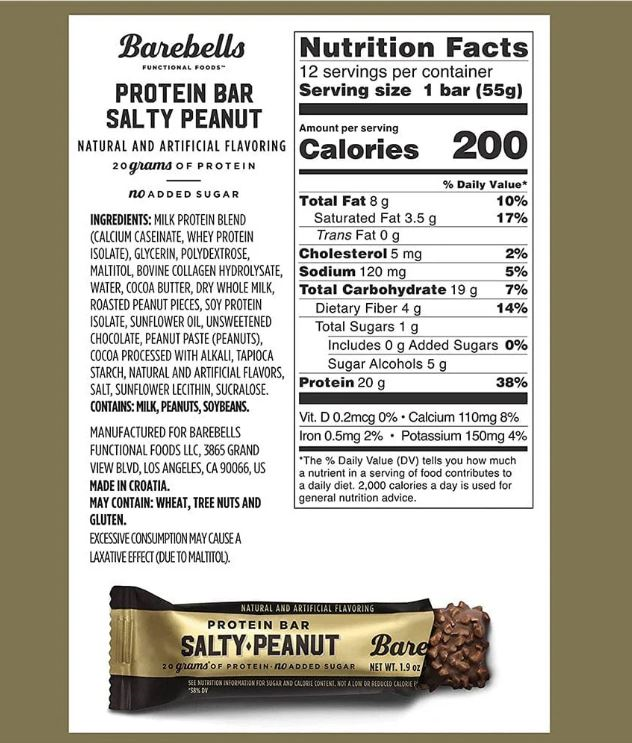


<div style='
    font-family: -apple-system, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
    margin: 10px 0;
'>
<h4 style='margin-top: 0; color: #4a90e2;'>MyFitnessPal Assistant</h4>
Here's the extracted nutrition information for the Barebells Protein Bar Salty Peanut:

- **Calories**: 200 per serving
- **Total Fat**: 8g (10% DV)
  - Saturated Fat: 4g (20% DV)
  - Trans Fat: 0g
- **Cholesterol**: 5mg (2% DV)
- **Sodium**: 140mg (6% DV)
- **Total Carbohydrate**: 19g (7% DV)
  - Dietary Fiber: 4g (14% DV)
  - Total Sugars: 1g
  - Added Sugars: 0g (0% DV)
- **Protein**: 20g (40% DV)

**Vitamins & Minerals**:
- Calcium: 200mg (15% DV)
- Iron: 0.1mg (0% DV)
- Potassium: 120mg (2% DV)

**Assessment**:
- **Positive Aspects**:
  - High protein content, which is beneficial for muscle repair and growth.
  - Low total sugar and no added sugar, supporting stable blood sugar levels.
  - Contains dietary fiber, aiding in digestive health.

- **Considerations**:
  - Contains saturated fat, which should be limited in the diet.
  - Moderate sodium content, appropriate for general consumption but should be balanced if sodium intake is a concern.

This product can be considered relatively healthy, especially as a protein-rich snack with minimal sugars. It should be part of a balanced diet, keeping an eye on the saturated fat and sodium levels.
</div>


In [33]:
# Install dependencies (if not done already)
!pip install openai ipywidgets --quiet

from IPython.display import display, Markdown, clear_output, Image
import ipywidgets as widgets
import time, os
from google.colab import files
from openai import OpenAI


# Create initial assistant thread
thread = client.beta.threads.create()

# --- Response Display Function ---
def display_response(message):
    response_text = ""
    for content_block in message.content:
        if content_block.type == "text":
            response_text = content_block.text.value
            break
    formatted_response = f"""
<div style='
    font-family: -apple-system, sans-serif;
    line-height: 1.6;
    color: #333;
    background-color: #f9f9f9;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #4a90e2;
    margin: 10px 0;
'>
<h4 style='margin-top: 0; color: #4a90e2;'>MyFitnessPal Assistant</h4>
{response_text}
</div>
"""
    display(Markdown(formatted_response))

# --- Upload + Analyze Nutrition Label Function ---
def upload_and_analyze_image():
    clear_output()
    print("📤 Please upload a new food label image...")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    # Normalize extension
    ext = os.path.splitext(filename)[1].lower()
    if ext not in ['.jpg', '.jpeg', '.png', '.webp']:
        raise ValueError(f"Unsupported file format: {ext}")
    if ext != os.path.splitext(filename)[1]:
        new_filename = os.path.splitext(filename)[0] + ext
        os.rename(filename, new_filename)
        filename = new_filename

    # Upload to OpenAI
    with open(filename, "rb") as image_file:
        upload = client.files.create(file=image_file, purpose="assistants")
    file_id = upload.id
    print("✅ Image uploaded successfully.")

    # Create image + instruction message
    client.beta.threads.messages.create(
        thread_id=thread.id,
        role="user",
        content=[
            {
                "type": "text",
                "text": "This is a photo of the back of a packaged food item. Please extract the nutrition label "
                        "(including calories, fat, protein, sugars, sodium, etc.), and assess if the product is healthy."
            },
            {
                "type": "image_file",
                "image_file": {"file_id": file_id}
            }
        ]
    )

    # Run assistant
    run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant_id)
    print("🔄 Analyzing...")
    while True:
        run_status = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
        if run_status.status == "completed":
            break
        time.sleep(1)

    # Display image + analysis
    messages = client.beta.threads.messages.list(thread_id=thread.id, order="desc", limit=1)
    display(Image(filename=filename))
    display_response(messages.data[0])

    # Redisplay chat and upload button
    display(widgets.HBox([chat_input, send_button, upload_button]))

# --- Chat Function ---
def send_message(user_input):
    client.beta.threads.messages.create(thread_id=thread.id, role="user", content=user_input)
    run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant_id)
    while True:
        run_status = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
        if run_status.status == "completed":
            break
        time.sleep(0.5)
    messages = client.beta.threads.messages.list(thread_id=thread.id, order="desc", limit=1)
    display_response(messages.data[0])

# --- Chat UI Elements ---
chat_input = widgets.Text(placeholder='Ask a follow-up question...', layout=widgets.Layout(width='60%'))
send_button = widgets.Button(description='Send', button_style='primary', layout=widgets.Layout(width='15%'))
upload_button = widgets.Button(description='📤 Upload New Image', layout=widgets.Layout(width='25%'))

# Chat & Upload Button Handlers
def on_send_clicked(b):
    user_message = chat_input.value
    if user_message.strip():
        display(Markdown(f"<div style='text-align: right; margin: 10px 0;'><strong>👤 You:</strong> {user_message}</div>"))
        send_message(user_message)
        chat_input.value = ''

def on_upload_clicked(b):
    upload_and_analyze_image()

send_button.on_click(on_send_clicked)
upload_button.on_click(on_upload_clicked)

upload_and_analyze_image()

---
END OF NOTEBOOK

---